In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data loading
file_path = Path("../Resources/data.csv")
df = pd.read_csv(file_path)
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,0,0,0,0,0,0,3,11,1,64
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,0,0,0,0,0,0,3,11,0,67
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,56
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,0,0,0,0,0,0,3,11,0,37
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,40
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,0,0,0,0,0,0,3,11,0,54
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,0,0,0,0,0,0,3,11,0,50
7,6177,1985,PhD,Married,33454.0,1,0,2013-08-05,32,76,...,0,0,0,0,0,0,3,11,0,36
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,0,0,0,0,0,0,3,11,1,47
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,1,0,0,0,0,0,3,11,0,71


In [3]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
Age                      int64
dtype: object

In [4]:
# Converting DT_Customer to datetime object

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], 
 format = '%Y-%m-%d', 
 errors = 'coerce')

In [5]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [6]:
df['ShoppingDay_month'] = df['Dt_Customer'].dt.month
df['ShoppingDay_week'] = df['Dt_Customer'].dt.week
df['ShoppingDay_day'] = df['Dt_Customer'].dt.day
df['ShoppingDay_dayofweek'] = df['Dt_Customer'].dt.dayofweek

In [14]:

# Cleaning new dataframe
df.pop('Dt_Customer')
df['Income'].astype(int)
df.dtypes

ID                         int64
Year_Birth                 int64
Education                 object
Marital_Status            object
Income                   float64
Kidhome                    int64
Teenhome                   int64
Recency                    int64
MntWines                   int64
MntFruits                  int64
MntMeatProducts            int64
MntFishProducts            int64
MntSweetProducts           int64
MntGoldProds               int64
NumDealsPurchases          int64
NumWebPurchases            int64
NumCatalogPurchases        int64
NumStorePurchases          int64
NumWebVisitsMonth          int64
AcceptedCmp3               int64
AcceptedCmp4               int64
AcceptedCmp5               int64
AcceptedCmp1               int64
AcceptedCmp2               int64
Complain                   int64
Z_CostContact              int64
Z_Revenue                  int64
Response                   int64
Age                        int64
ShoppingDay_month          int64
ShoppingDa

In [8]:
#Looking at new data to get an idea of habits
#df.groupby('ShoppingDay_month').size()
#df.groupby('ShoppingDay_day').size()
#df.groupby('ShoppingDay_dayofweek').size()

In [15]:
#Adding dummies for string columns
data = pd.get_dummies(df,columns = ['Education', 'Marital_Status'])


In [22]:
labels = df['Kidshome'].values

KeyError: 'Kidshome'

In [20]:
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
mergings = linkage(data, method='ward')

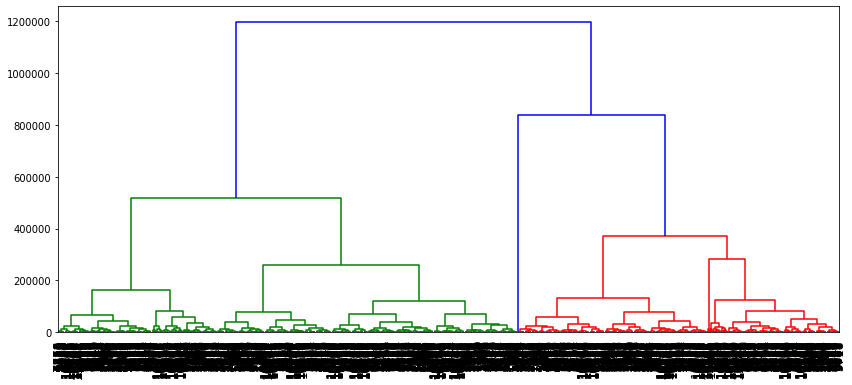

In [21]:
plt.figure(figsize=(14,6))
dendrogram(mergings,
          labels=np.array(labels),
          leaf_rotation=90,
          leaf_font_size=12)
plt.show()